<span style='color:red;background-color:yellow;font-weight:bold;'>^^^ fill missing, provide examples</span>

<span style='color:red;background-color:yellow;font-weight:bold;'>^^^ could call next section "Financial Markets"</span>

<span style='color:red;background-color:yellow;font-weight:bold;'>^^^ how does the order book work</span>

## Time series of the asset classes and their correlations

### Data sources and descriptions

<span style='color:red;background-color:yellow;font-weight:bold;'>^^^ table right column: fill missing explanations</span>

<span style='color:red;background-color:yellow;font-weight:bold;'>^^^ below table: explain downloads, do not repeat download instructions of notebook 06</span>

<span style='color:red;background-color:yellow;font-weight:bold;'>^^^ below display df: plot data sets all points</span>


Note: these data sets are focused on the US.

| Type | Source | Name, Link to page | Comments |
| :--- | :--| :--- | :--- |
| Bonds index | Yahoo | [Fidelity Total Bond Fund (FTBFX)](https://finance.yahoo.com/quote/FTBFX/history) | &nbsp; |
| Commodity index | Yahoo | [BBG Commodity (^BCOM)](https://finance.yahoo.com/quote/%5EBCOM/history) | &nbsp; |
| Equity index | Yahoo | [S&P 500 (^GSPC)](https://finance.yahoo.com/quote/%5EGSPC/history) | &nbsp; |
| FX | FRED | [USD / EUR Exchange Rate (DEXUSEU)](https://fred.stlouisfed.org/series/DEXUSEU) | &nbsp; |
| Rates | FRED | [3-Month Treasury Constant Maturity Rate (DGS3MO)](https://fred.stlouisfed.org/series/DGS3MO) | Used as an approximation for the risk-free rate |
| Real estate index | FRED | [Wilshire US Real Estate Securities Price Index (WILLRESIPR)](https://fred.stlouisfed.org/series/WILLRESIPR) | &nbsp; |
| Inflation (Price index) | FRED | [US Consumer Price Index (CPALTT01USM657N)](https://fred.stlouisfed.org/series/CPALTT01USM657N) | This data set is monthly, and it is a percent comparison to 1Y before. |

###### Notes on the data and the code

* processing depends on source
* inflation data is very different from all others: it is a (1) percent value (2) once a month (3) compared to 1Y before
* `pd.concat` is used for the (full) outer join to keep all dates available in at least one of the two merged series
* ordered dict

<span style='color:red;background-color:yellow;font-weight:bold;'>^^^ leave diag and lower triangle blank</span>

### All data points: Daily (monthly)

###### Task
Display the first 100 rows and the last 100 rows of the dataframe `df_all` that contains all data sets.

<span style='color:red;background-color:yellow;font-weight:bold;'>^^^ ordered dict to ensure order</span>

In [109]:
import os
import pandas as pd
import numpy as np

DATA_DIR = 'data'
FILE_EXT = 'csv'
DATA_SETS = {
    '^GSPC': {'source': 'Yahoo', 'name': 'S&P 500'},
    '^BCOM': {'source': 'Yahoo', 'name': 'BBG Commodity'},
    'DEXUSEU': {'source': 'FRED', 'name': 'USD / EUR Exchange Rate'},
    'DGS3MO': {'source': 'FRED', 'name': '3-Month Treasury Constant Maturity Rate'},
    'FTBFX': {'source': 'Yahoo', 'name': 'Fidelity Total Bond Fund', },
    'CPALTT01USM657N': {'source': 'FRED', 'name': 'US Consumer Price Index', 'is_price_index': ''},
    'WILLRESIPR': {'source': 'FRED', 'name': 'Wilshire US Real Estate Securities Price Index'}}


def display_setting(max_value=10):
    """Setting display options for dataframes"""
    for setting_type in ['max_rows', 'max_columns', 'width', 'max_colwidth']:
        pd.set_option('display.' + setting_type, max_value)


def read_data(data_dir=None, data_sets=None, file_ext=None):
    """Read financial csv data downloaded from Yahoo or the FRED"""
    df_all = pd.DataFrame()
    for data_set_code, data_set_params in data_sets.items():

        # read values for the current data set
        df = pd.read_csv(os.path.join(data_dir, data_set_code + '.' + file_ext), na_values=['.', 0])
        if data_set_params['source'] == 'Yahoo':
            df.index = pd.to_datetime(df['Date'])
        elif data_set_params['source'] == 'FRED':
            df.index = pd.to_datetime(df['DATE'])
            df['Close'] = df[data_set_code]
        else:
            raise ValueError('Reading data of this type is not implemented: {}'.format(data_set_params['Type']))

        # save values for the current data set
        if 'is_price_index' in data_set_params:  # save the price index as it is
            r = pd.DataFrame(df['Close'])       
        else:  # for all others: convert the daily value to daily log return
            r = pd.DataFrame(np.log(df['Close']) - np.log(df['Close'].shift()))

        r.columns = [data_set_params['name']]
        df_all = r.copy() if len(df_all.columns) == 0 else pd.concat([df_all, r], axis=1)

    return df_all


df_all = read_data(data_dir=DATA_DIR, data_sets=DATA_SETS, file_ext=FILE_EXT)
display(df_all)  # default behavior: display first and last 5 rows

,S&P 500,BBG Commodity,USD / EUR Exchange Rate,3-Month Treasury Constant Maturity Rate,Fidelity Total Bond Fund,US Consumer Price Index,Wilshire US Real Estate Securities Price Index
1927-12-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1928-01-03,0.005647,NaN,NaN,NaN,NaN,NaN,NaN
1928-01-04,-0.002255,NaN,NaN,NaN,NaN,NaN,NaN
1928-01-05,-0.009640,NaN,NaN,NaN,NaN,NaN,NaN
1928-01-06,0.006248,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2020-10-08,0.007978,0.005001,-0.001105,-0.105361,0.001744,NaN,NaN
2020-10-09,0.008755,0.014992,0.005600,0.105361,-0.026480,NaN,NaN
2020-10-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-10-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN


###### Plot all available data points

Note: yscale = symlog didn't work, so the solution is to plot in two pieces

###### Task: What do these plots mean ?

* Can you spot differences, similarities, or otherwise general patterns ?

* Can you explain these ?

* What conclusions or predictions / hypotheses can you make ?

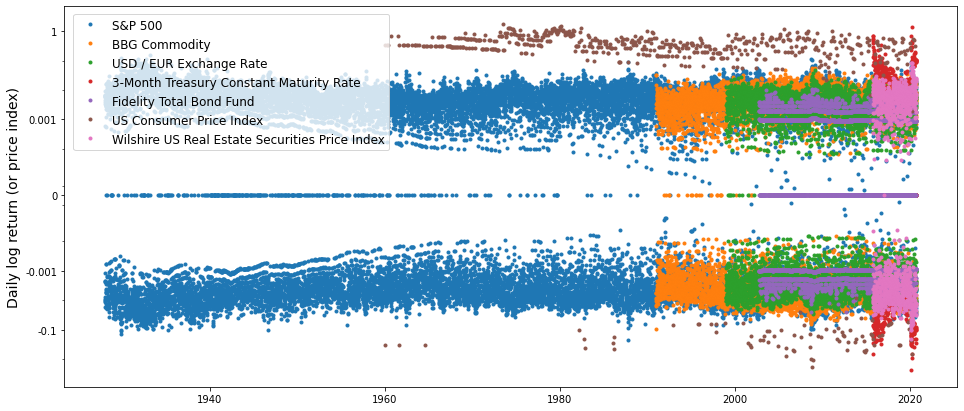

In [146]:
import pandas as pd
import matplotlib.pyplot as plt
from numbers import Number

FONTSIZE=14
FONTSIZE_SMALL=12
DISPLAY_RATIO = 5
YTICS = [0, 1, 1e-3, -1e-3, -0.1]


def df_numbers_min_pos_max_neg(df):
    """The smallest positive and the highest negative number from the provided dataframe"""
    assert isinstance(df, pd.DataFrame), 'Input has to be a dataframe'
    
    min_pos = None  # lowest positive value
    max_neg = None  # highest negative value
    for _, column_values in df.iteritems():
        column_values_positive = [x for x in column_values if isinstance(x, Number) and x > 0.0]
        column_values_negative = [x for x in column_values if isinstance(x, Number) and x < 0.0]
        if len(column_values_positive) > 0:
            min_pos = min(column_values_positive) if min_pos is None else min(min(column_values_positive), min_pos)
        if len(column_values_negative) > 0:
            max_neg = max(column_values_negative) if max_neg is None else max(max(column_values_negative), max_neg)
        
    return min_pos, max_neg


def plot_selected_data_symlog_y(df=None, ytics=[]):
    """Plot the selected financial data sets with symmetric log y axis"""
    if df is not None:
        min_pos, max_neg = df_numbers_min_pos_max_neg(df)
        
        for data_set_name in df.columns:
            plt.plot(df[data_set_name], lw=0, marker='.', label=data_set_name)
        plt.yscale('symlog', linthresh=max(-max_neg, min_pos) * DISPLAY_RATIO)
        plt.ylabel('Daily log return (or price index)', fontsize=FONTSIZE)
        plt.yticks(ytics, [str(_) for _ in ytics])
        plt.legend(bbox_to_anchor=(0.01, .98), loc=2, borderaxespad=0., fontsize=FONTSIZE_SMALL)
        
        fig = plt.gcf()
        fig.set_size_inches([16, 7])
        plt.show()


plot_selected_data_symlog_y(df_all, ytics=YTICS)

###### Correlation matrix of the data sets

In [57]:
df_all.corr()

,Fidelity Total Bond Fund,BBG Commodity,S&P 500,USD / EUR Exchange Rate,3-Month Treasury Constant Maturity Rate,US Consumer Price Index,Wilshire US Real Estate Securities Price Index
Fidelity Total Bond Fund,1.000000,0.005978,-0.140070,0.124322,0.086432,-0.220900,0.199761
BBG Commodity,0.005978,1.000000,0.218296,0.270636,0.101209,0.236257,0.287418
S&P 500,-0.140070,0.218296,1.000000,0.047654,0.164684,0.100363,0.758716
USD / EUR Exchange Rate,0.124322,0.270636,0.047654,1.000000,-0.015917,-0.036154,0.034471
3-Month Treasury Constant Maturity Rate,0.086432,0.101209,0.164684,-0.015917,1.000000,0.071538,0.184709
US Consumer Price Index,-0.220900,0.236257,0.100363,-0.036154,0.071538,1.000000,0.459655
Wilshire US Real Estate Securities Price Index,0.199761,0.287418,0.758716,0.034471,0.184709,0.459655,1.000000


### Aggreated yearly

###### Display the df_all matrix

<span style='color:red;background-color:yellow;font-weight:bold;'>^^^ yearly agg `df_all`</span>

###### Plot the time series in the df_all matrix

<span style='color:red;background-color:yellow;font-weight:bold;'>^^^ plot time series</span>

###### Calculate and display the correlation matrix


<span style='color:red;background-color:yellow;font-weight:bold;'>^^^ calculate corr w yearly agg `df_all`</span>


## Basic (non-derivative) financial products by asset class

### Stocks (Equities)
A stock (equity investment) is a partial ownership of a commercial entity.

Net income/expenses arise from: (1) change in value while owning it (2) dividends (3) debts and liabilities.
<br/>
Here "net" means the sum of the listed items with their respective signs: plus sign for income, minus sign for expense.

###### Dividends

Dividends: payments to shareholders<br/>
<span style='color:red;background-color:yellow;font-weight:bold;'>^^^ show influence of dividend on share price</span>


###### Example: IBM split announced in the morning of Oct 08, 2020

[Announcement of IBM's spin-off company](https://newsroom.ibm.com/2020-10-08-IBM-To-Accelerate-Hybrid-Cloud-Growth-Strategy-And-Execute-Spin-Off-Of-Market-Leading-Managed-Infrastructure-Services-Unit) --> IBM stock price jumped (image source: Google) ![IBM stock price jumped from Oct 07 to Oct 08](./img/IBM-stock-2020-Oct-05-to-09.PNG "IBM stock price jumped from Oct 07 to Oct 08")



### Fixed income (Bonds)

Description at the US SEC (Securities and Exchanges Commission):<br/>
https://www.investor.gov/introduction-investing/investing-basics/investment-products/bonds-or-fixed-income-products/bonds

T-Bills (sometimes categorized under Cash):<br/>
Explain how they're quoted - https://www.newyorkfed.org/aboutthefed/fedpoint/fed07.html

Coupons vs Dividends: what are the differnces and similarities

###### Example: Discounting a fixed list of coupons


### FX

FX: Foreign Exchange

currencies, incl crypto


who wins, who loses


Compare autocorrelation length of FX with autocorrelation length of the other asset classes


Compare trading volumes of some asset classes, and within those some types of products

### Commodities

intro: https://global.pimco.com/en-gbl/resources/education/understanding-commodities

### Credit
https://www.investopedia.com/terms/c/credit_market.asp

<span style='color:red;background-color:yellow;font-weight:bold;'>^^^ Credit market vs Bonds</span>

### Real Estate

Wilshire Real Estate index, https://fred.stlouisfed.org/series/WILLRESIPR



### Infrastructure

## Constructing financial products with Derivatives

Futures, Forwards, Options, Swaps, ...

Put-Call parity

Greeks

Hedging with derivatives

## Derivative financial products

Each asset class has its own

Can combine asset classes


## Recommended

https://www.investopedia.com --> Equity, Commodity, Credit, FX, Derivatives